# BEGINNER TASK-1 : Iris Flowers Classification ML Project


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('c:/users/annam/Downloads/Iris.csv',index_col = 'Id')
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
df.dtypes


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

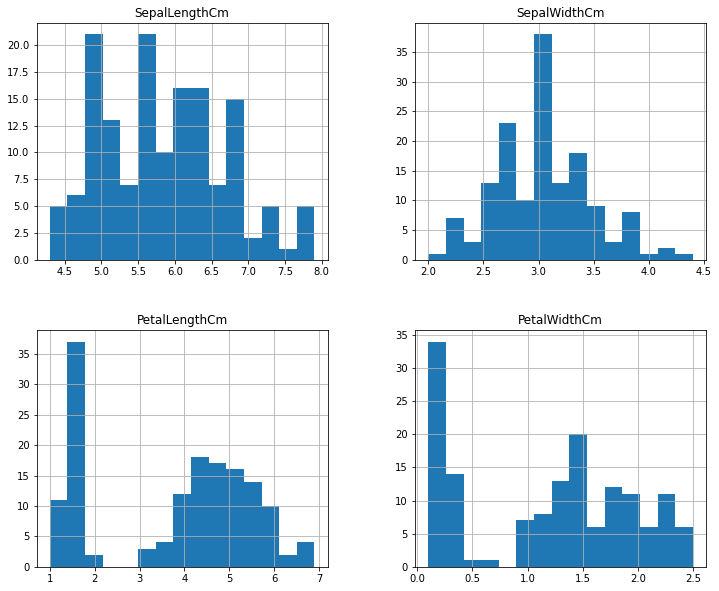

In [9]:
# HISTOGRAM
df.hist(figsize=(12,10),bins=15)
plt.show()

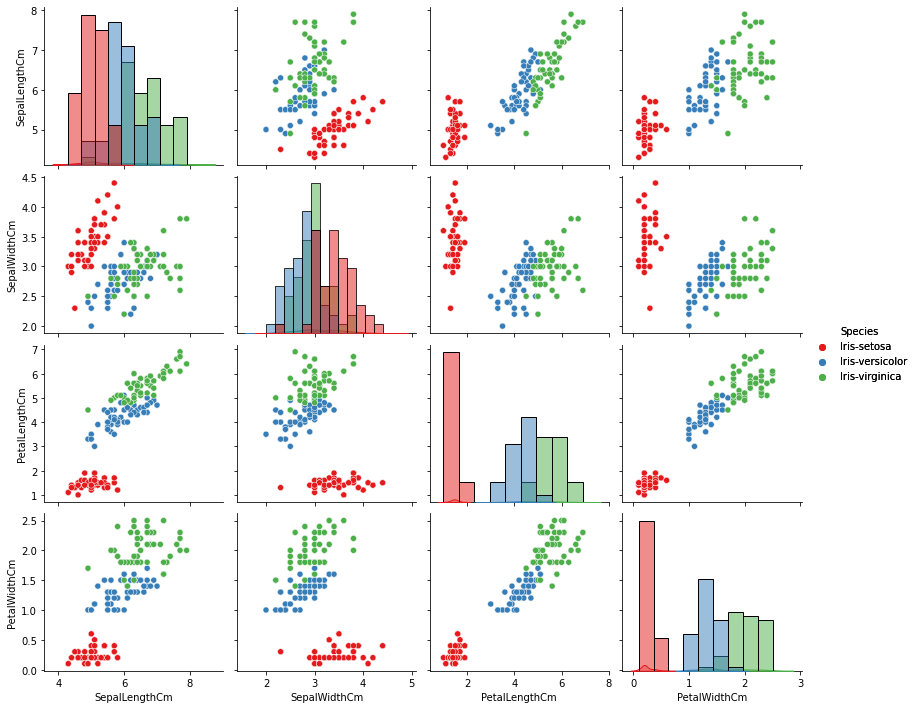

In [10]:
# HISTPLOT AND SCATTERPLOT
p = sns.pairplot(df,hue='Species',palette="Set1")
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)
p.add_legend()

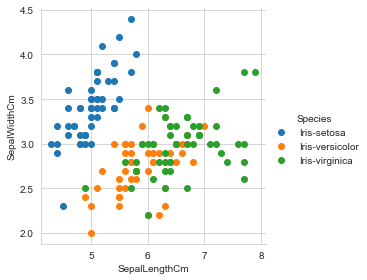

In [11]:
#SCATTER PLOT OF SEPAL LENGTH VS SEPAL WIDTH
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Species",height=4) \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend();
plt.show();

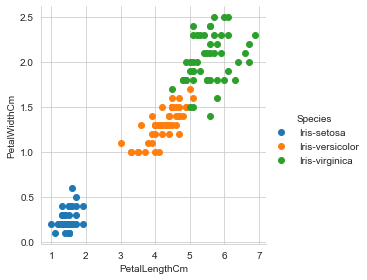

In [12]:
# SCATTERPLOT OF PETAL LENGTH VS PETAL WIDTH
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Species",height=4) \
    .map(plt.scatter,"PetalLengthCm","PetalWidthCm") \
    .add_legend();
plt.show();

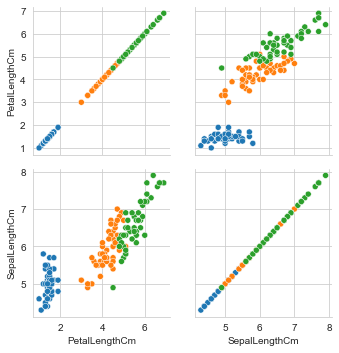

In [13]:
# SCATTER PLOT OF PETAL LENGTH AND SEPAL LENGTH  OF VARIOUS SPECIES
p = sns.PairGrid(df,vars=["PetalLengthCm","SepalLengthCm"],hue="Species")
p.map(sns.scatterplot)

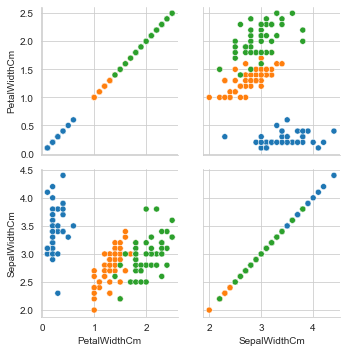

In [14]:
# SCATTER PLOT OF PETAL WIDTH AND SEPAL WIDTH OF VARIOUS SPECIES
p = sns.PairGrid(df,vars=["PetalWidthCm","SepalWidthCm"],hue="Species")
p.map(sns.scatterplot)

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


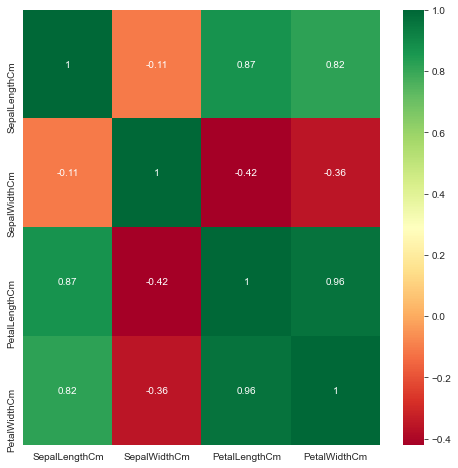

In [16]:
#HEAT MAP
plt.figure(figsize=(8,8))
p = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
#SPLITING DATA SET
X = df.drop(['Species'], axis=1)
y = df['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [19]:
# TEST AND TRAIN SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
# DEFINING VARIOUS MACHINE LEARNING MODEL
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.971818 (0.043112)
KNN: 0.952727 (0.062430)
CART: 0.953636 (0.046435)
SVC: 0.980909 (0.038236)


In [21]:
# TRAINING THE MODEL
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [23]:
# TESTING THE MODEL 
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9777777777777777
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

